In [1]:
import netpixi
from graph_tool import draw
import graph_tool_extras as gte

import distribution as dst

from graph_tool import centrality

In [2]:
g = gte.load('./rede.net.gz')

In [3]:
print(f'Número de Verticies: {g.num_vertices()}')
print(f'Número de Arestas: {g.num_edges()}')

Número de Verticies: 17903
Número de Arestas: 197031


In [4]:
print(f'Densidade: {g.density()}%')

Densidade: 0.122952%


In [5]:
print(f'Transitividade: {g.transitivity()}%')

Transitividade: 31.777791%


In [6]:
degrees = g.get_total_degrees()
degrees.describe()

count    17903.000000
mean        22.010948
std         31.016923
min          1.000000
25%          4.000000
50%         10.000000
75%         28.000000
max        504.000000
dtype: float64

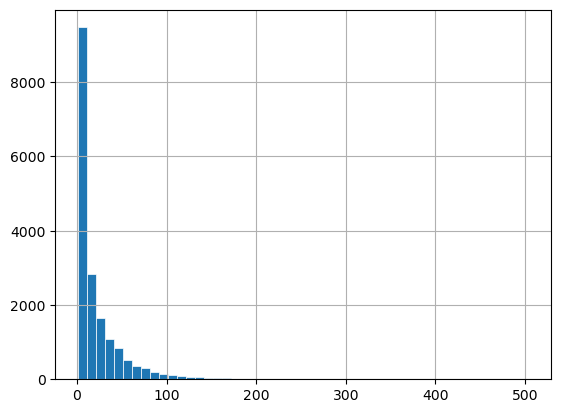

In [7]:
degrees.hist(bins=50, edgecolor='white', linewidth=0.5);

In [8]:
p_value = dst.not_normal(degrees)
print(f'Not Normal: {'<0.001' if p_value < 0.001 else float(p_value)}')

Not Normal: <0.001


In [9]:
powerlaw, p_value = dst.more_powerlaw_than_lognormal(degrees)
print(f'More Powerlaw than Lognormal: {'{float(p_value)} (Inconclusivo)' if 0.05 < p_value < 0.1 else ('<0.001' if  p_value < 0.001 else float(p_value))} {'[powerlaw]' if powerlaw else ''}')

More Powerlaw than Lognormal: 0.868075646237589 


Calculating best minimal value for power law fit
/opt/miniconda/envs/jupyterlab/lib/python3.12/site-packages/powerlaw.py:699: RuntimeWarning: invalid value encountered in divide
  (CDF_diff**2) /


In [10]:
powerlaw, p_value = dst.more_powerlaw_than_exponential(degrees)
print(f'More Powerlaw than Exponential: {'{float(p_value)} (Inconclusivo)' if 0.05 < p_value < 0.1 else ('<0.001' if  p_value < 0.001 else float(p_value))} {'[powerlaw]' if powerlaw else ''}')

More Powerlaw than Exponential: 0.014483332945893693 [powerlaw]


Calculating best minimal value for power law fit


In [11]:
distances = g.get_distances()


In [ ]:
distances.describe()


In [12]:
#distances.hist()

In [13]:
#g.closeness()